# MLP (Regression)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
import  keras
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### import data

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/data.csv')

In [ ]:
Data=df
Data.head(5).T

,0,1,2,3,4
date,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00
price,313000.0,2384000.0,342000.0,420000.0,550000.0
bedrooms,3.0,5.0,3.0,3.0,4.0
bathrooms,1.5,2.5,2.0,2.25,2.5
sqft_living,1340,3650,1930,2000,1940
sqft_lot,7912,9050,11947,8030,10500
floors,1.5,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,4,0,0,0
condition,3,5,4,4,4


## Pre Processing

In [ ]:
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


#### Let’s plot couple of features to get a better feel of the data


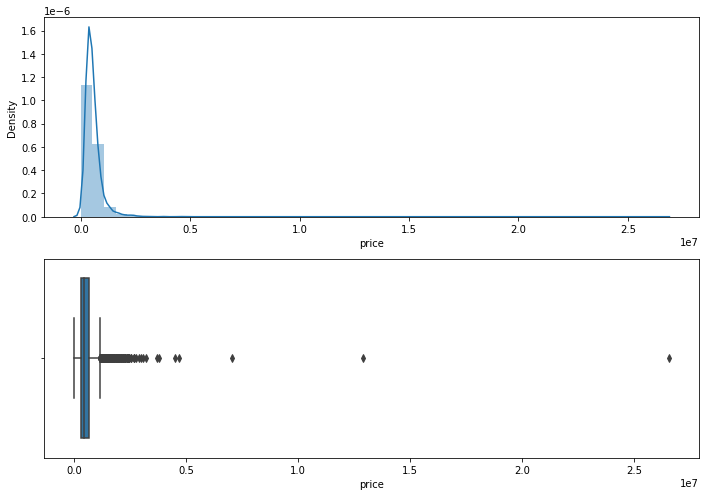

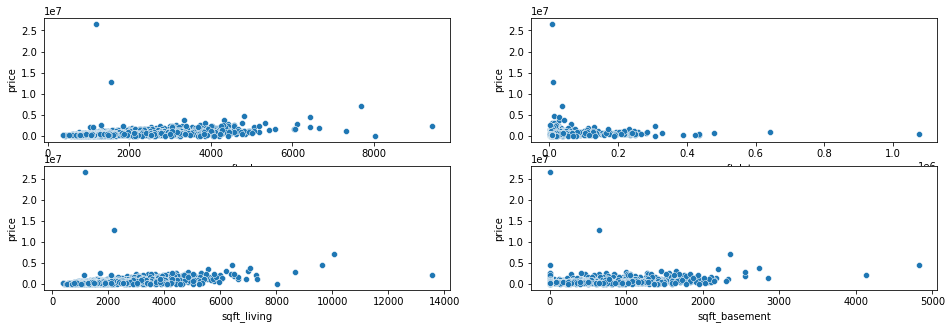

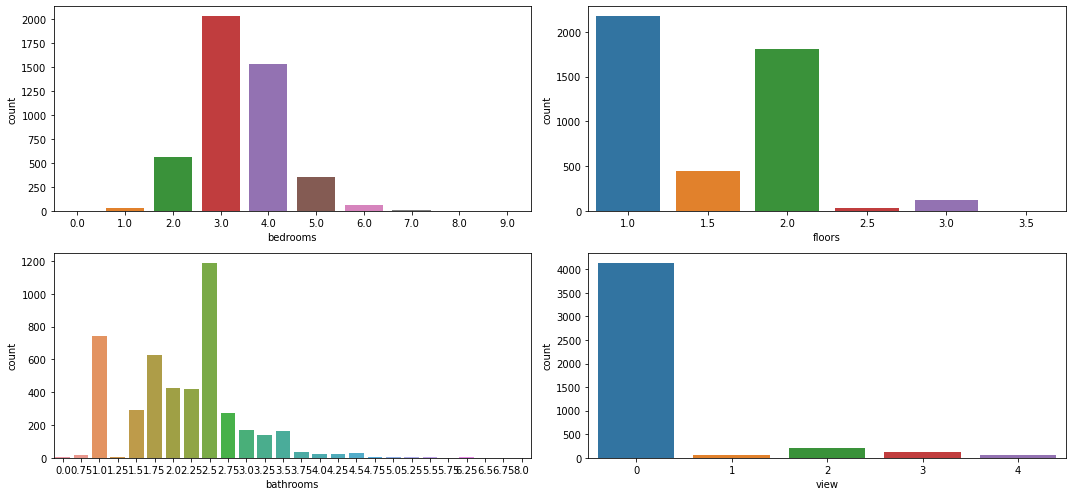

In [ ]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['price'])
plt.tight_layout()
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['sqft_above'], Data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['sqft_lot'],Data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['sqft_living'],Data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['sqft_basement'],Data['price'])
#visualizing bedrooms,bathrooms,floors,view
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(Data['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(Data['floors'])
fig.add_subplot(2,2,3)
sns.countplot(Data['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(Data['view'])
plt.tight_layout()

In [ ]:
# check if there are any Null values
Data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
print('Replaced {} rows with the average' .format(len(Data[Data.price==0])))
print('price average is equal to:',Data["price"].mean())
Data['price']=Data['price'].replace(0,Data['price'].mean())

Replaced 49 rows with the average
price average is equal to: 551962.9884732141


In [ ]:
def preprocess_name(text_col):
    preprocessed_names = []
    for sentence in tqdm(text_col.values):
        sent = sentence.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        preprocessed_names.append(sent.lower().strip())
    return preprocessed_names

In [ ]:
preprocessed_names=preprocess_name(Data['street'])
preprocessed_city=preprocess_name(Data['city'])
preprocessed_date=preprocess_name(Data['date'])
preprocessed_statezip=preprocess_name(Data['statezip'])
for i in range(len(preprocessed_date)):
    preprocessed_date[i]=preprocessed_date[i][0:10]
    preprocessed_statezip[i]=preprocessed_statezip[i][3:] 

100%|██████████| 4600/4600 [00:00<00:00, 322606.40it/s]


In [ ]:
Data['statezip']=preprocessed_statezip
Data['date']=preprocessed_date
Data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014 05 02,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,98133,USA
1,2014 05 02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,98119,USA
2,2014 05 02,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,98042,USA
3,2014 05 02,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,98008,USA
4,2014 05 02,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014 07 09,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,98133,USA
4596,2014 07 09,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,98007,USA
4597,2014 07 09,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,98059,USA
4598,2014 07 10,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,98178,USA


In [ ]:
Data = Data.drop('date',axis =1)
Data = Data.drop('country',axis =1)

In [ ]:
label_encoder = LabelEncoder()
Data["city"] = label_encoder.fit_transform(Data["city"])
Data["street"] = label_encoder.fit_transform(Data["street"])
#Data["date"] = label_encoder.fit_transform(Data["date"])
#Data["country"] = label_encoder.fit_transform(Data["country"])

In [ ]:
X = Data.drop('price',axis =1).values
y = Data['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#s_scaler = StandardScaler()
#X_train = s_scaler.fit_transform(X_train.astype(np.float))
#X_test = s_scaler.transform(X_test.astype(np.float))

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_train).astype(np.float32)
y_test= np.asarray(y_train).astype(np.float32)

## Model Selection and Evaluation

#### Model One : 2 layers with ReLu as of activation function

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu',input_shape=(15,),kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mse', 'mae'])
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True,verbose=1)
trained_model = model.fit(X_train,y_train, batch_size=16, epochs=150, validation_split=0.15 ,callbacks =[earlystopping]) 
history = trained_model.history

Epoch 1/150
196/196 [==============================] - 1s 3ms/step - loss: 640621805568.0000 - mse: 640621805568.0000 - mae: 541944.5000 - val_loss: 343080861696.0000 - val_mse: 343080861696.0000 - val_mae: 487943.7812
Epoch 2/150
196/196 [==============================] - 0s 2ms/step - loss: 530527715328.0000 - mse: 530527715328.0000 - mae: 428815.4688 - val_loss: 210369118208.0000 - val_mse: 210369118208.0000 - val_mae: 332702.6562
Epoch 3/150
196/196 [==============================] - 0s 2ms/step - loss: 413027729408.0000 - mse: 413027729408.0000 - mae: 285389.9375 - val_loss: 128752836608.0000 - val_mse: 128752836608.0000 - val_mae: 228885.7031
Epoch 4/150
196/196 [==============================] - 0s 2ms/step - loss: 361194422272.0000 - mse: 361194422272.0000 - mae: 236050.9688 - val_loss: 106112589824.0000 - val_mse: 106112589824.0000 - val_mae: 214360.7812
Epoch 5/150
196/196 [==============================] - 0s 2ms/step - loss: 349251862528.0000 - mse: 349251862528.0000 - mae:

#### evalute number of neurons and layers

In [ ]:
# history
Y_pred = model.predict(X_test)
y_pred=np.ravel(Y_pred)  
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 178404.83
MSE: 255575100000.0
VarScore: 0.177839457988739


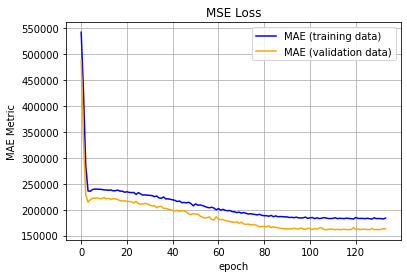

In [ ]:
plt.title('MSE Loss')
plt.plot(history['mae'], label='MAE (training data)',color='blue')
plt.plot(history['val_mae'], label='MAE (test data)',color='orange')
plt.ylabel('MAE Metric')
plt.xlabel('epoch')
plt.grid()
plt.legend(['MAE (training data)', 'MAE (validation data)'], loc='upper right')
plt.show()

#### Model Two : 2 layers with Sigmoid as of activation function

In [ ]:
model = Sequential()
model.add(Dense(10, activation='sigmoid',input_shape=(15,),kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mse', 'mae'])
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True,verbose=1)
trained_model = model.fit(X_train,y_train, batch_size=16, epochs=150, validation_split=0.15 ,callbacks =[earlystopping]) 
history = trained_model.history

Epoch 1/150
196/196 [==============================] - 2s 5ms/step - loss: 660585775104.0000 - mse: 660585775104.0000 - mae: 560127.6875 - val_loss: 402745425920.0000 - val_mse: 402745425920.0000 - val_mae: 544667.2500
Epoch 2/150
196/196 [==============================] - 1s 4ms/step - loss: 660584857600.0000 - mse: 660584857600.0000 - mae: 560126.7500 - val_loss: 402744410112.0000 - val_mse: 402744410112.0000 - val_mae: 544666.2500
Epoch 3/150
196/196 [==============================] - 1s 3ms/step - loss: 660583809024.0000 - mse: 660583809024.0000 - mae: 560125.8125 - val_loss: 402743427072.0000 - val_mse: 402743427072.0000 - val_mae: 544665.2500
Epoch 4/150
196/196 [==============================] - 1s 3ms/step - loss: 660582563840.0000 - mse: 660582563840.0000 - mae: 560124.8750 - val_loss: 402742378496.0000 - val_mse: 402742378496.0000 - val_mae: 544664.3125
Epoch 5/150
196/196 [==============================] - 1s 3ms/step - loss: 660581515264.0000 - mse: 660581515264.0000 - mae:

#### evalute number of neurons and layers

In [ ]:
# history
Y_pred = model.predict(X_test)
y_pred=np.ravel(Y_pred)  
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 557666.06
MSE: 621750500000.0
VarScore: 6.556510925292969e-07


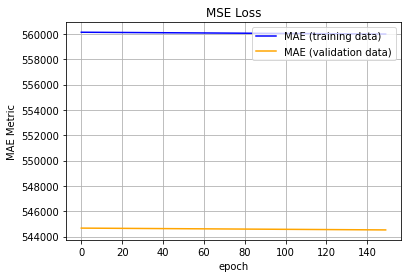

In [ ]:
plt.title('MSE Loss')
plt.plot(history['mae'], label='MAE (training data)',color='blue')
plt.plot(history['val_mae'], label='MAE (test data)',color='orange')
plt.ylabel('MAE Metric')
plt.xlabel('epoch')
plt.grid()
plt.legend(['MAE (training data)', 'MAE (validation data)'], loc='upper right')
plt.show()

#### Model Three : 3 layers with ReLu as of activation function

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu',input_shape=(15,),kernel_initializer='normal'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mse', 'mae'])
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True,verbose=1)
trained_model = model.fit(X_train,y_train, batch_size=16, epochs=150, validation_split=0.15 ,callbacks =[earlystopping]) 
history = trained_model.history

Epoch 1/150
196/196 [==============================] - 2s 5ms/step - loss: 649154396160.0000 - mse: 649154396160.0000 - mae: 549736.1250 - val_loss: 350952816640.0000 - val_mse: 350952816640.0000 - val_mae: 495732.3438
Epoch 2/150
196/196 [==============================] - 1s 3ms/step - loss: 474847313920.0000 - mse: 474847313920.0000 - mae: 362286.0312 - val_loss: 119470604288.0000 - val_mse: 119470604288.0000 - val_mae: 220081.7656
Epoch 3/150
196/196 [==============================] - 1s 3ms/step - loss: 351894700032.0000 - mse: 351894700032.0000 - mae: 237552.2031 - val_loss: 102744653824.0000 - val_mse: 102744653824.0000 - val_mae: 220917.3281
Epoch 4/150
196/196 [==============================] - 1s 4ms/step - loss: 346402422784.0000 - mse: 346402422784.0000 - mae: 240461.8906 - val_loss: 101439307776.0000 - val_mse: 101439307776.0000 - val_mae: 222424.0781
Epoch 5/150
196/196 [==============================] - 1s 4ms/step - loss: 343971790848.0000 - mse: 343971790848.0000 - mae:

#### evalute number of neurons and layers

In [ ]:
# history
Y_pred = model.predict(X_test)
y_pred=np.ravel(Y_pred)  
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 178458.27
MSE: 255936950000.0
VarScore: 0.17681866884231567


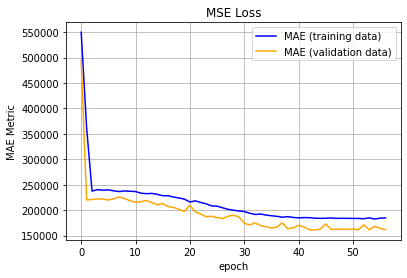

In [ ]:
plt.title('MSE Loss')
plt.plot(history['mae'], label='MAE (training data)',color='blue')
plt.plot(history['val_mae'], label='MAE (test data)',color='orange')
plt.ylabel('MAE Metric')
plt.xlabel('epoch')
plt.grid()
plt.legend(['MAE (training data)', 'MAE (validation data)'], loc='upper right')
plt.show()

#### Model Four : 3 layers with Sigmoid as of activation *function*

In [ ]:
model = Sequential()
model.add(Dense(10, activation='sigmoid',input_shape=(15,),kernel_initializer='normal'))
model.add(Dense(8,  activation='sigmoid'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mse', 'mae'])
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True,verbose=1)
trained_model = model.fit(X_train,y_train, batch_size=16, epochs=150, validation_split=0.15 ,callbacks =[earlystopping]) 
history = trained_model.history

Epoch 1/150
196/196 [==============================] - 2s 4ms/step - loss: 660585644032.0000 - mse: 660585644032.0000 - mae: 560127.3750 - val_loss: 402744967168.0000 - val_mse: 402744967168.0000 - val_mae: 544666.6875
Epoch 2/150
196/196 [==============================] - 1s 4ms/step - loss: 660583284736.0000 - mse: 660583284736.0000 - mae: 560125.5625 - val_loss: 402742378496.0000 - val_mse: 402742378496.0000 - val_mae: 544664.3750
Epoch 3/150
196/196 [==============================] - 1s 3ms/step - loss: 660581187584.0000 - mse: 660581187584.0000 - mae: 560123.1250 - val_loss: 402740150272.0000 - val_mse: 402740150272.0000 - val_mae: 544662.2500
Epoch 4/150
196/196 [==============================] - 1s 4ms/step - loss: 660578566144.0000 - mse: 660578566144.0000 - mae: 560121.2500 - val_loss: 402738118656.0000 - val_mse: 402738118656.0000 - val_mae: 544660.3750
Epoch 5/150
196/196 [==============================] - 1s 3ms/step - loss: 660576665600.0000 - mse: 660576665600.0000 - mae:

#### evalute number of neurons and layers


In [ ]:
# history
Y_pred = model.predict(X_test)
y_pred=np.ravel(Y_pred)  
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 557551.6
MSE: 621623100000.0
VarScore: 0.0


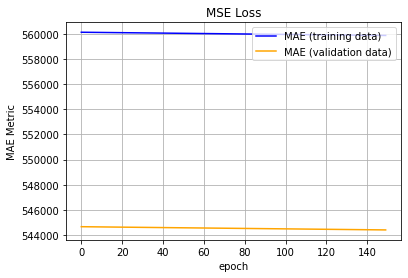

In [ ]:
plt.title('MSE Loss')
plt.plot(history['mae'], label='MAE (training data)',color='blue')
plt.plot(history['val_mae'], label='MAE (test data)',color='orange')
plt.ylabel('MAE Metric')
plt.xlabel('epoch')
plt.grid()
plt.legend(['MAE (training data)', 'MAE (validation data)'], loc='upper right')
plt.show()

## MSE LOSS

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu',input_shape=(15,),kernel_initializer='normal'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1, kernel_initializer='normal',activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mse', 'mae'])
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True,verbose=1)
trained_model = model.fit(X_train,y_train, batch_size=16, epochs=150, validation_split=0.15 ,callbacks =[earlystopping]) 
history = trained_model.history

Epoch 1/150
196/196 [==============================] - 2s 5ms/step - loss: 629301116928.0000 - mse: 629301116928.0000 - mae: 530759.1875 - val_loss: 281779535872.0000 - val_mse: 281779535872.0000 - val_mae: 421746.1250
Epoch 2/150
196/196 [==============================] - 1s 6ms/step - loss: 402024988672.0000 - mse: 402024988672.0000 - mae: 287001.7500 - val_loss: 103604723712.0000 - val_mse: 103604723712.0000 - val_mae: 220586.6562
Epoch 3/150
196/196 [==============================] - 0s 2ms/step - loss: 346513670144.0000 - mse: 346513670144.0000 - mae: 242486.1250 - val_loss: 101531484160.0000 - val_mse: 101531484160.0000 - val_mae: 220354.9062
Epoch 4/150
196/196 [==============================] - 0s 2ms/step - loss: 343543513088.0000 - mse: 343543513088.0000 - mae: 238010.4531 - val_loss: 100730257408.0000 - val_mse: 100730257408.0000 - val_mae: 225032.8281
Epoch 5/150
196/196 [==============================] - 0s 2ms/step - loss: 342775365632.0000 - mse: 342775365632.0000 - mae:

In [ ]:
# history
Y_pred = model.predict(X_test)
#y_pred=np.ravel(Y_pred)  
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 179111.34
MSE: 255186980000.0
VarScore: 0.17945069074630737


In [ ]:
# prediction
print(y_pred)
print(y_test)

[373044.97 556985.44 610380.25 ... 594274.6  508689.25 627313.4 ]
[320000. 411000. 687000. ... 450000. 283200. 550000.]


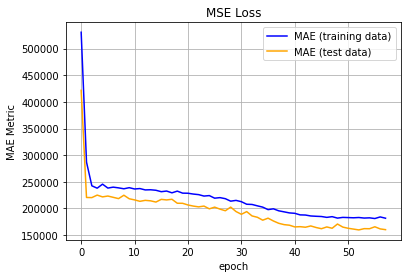

In [ ]:
plt.title('MSE Loss')
plt.plot(history['mae'], label='MAE (training data)',color='blue')
plt.plot(history['val_mae'], label='MAE (test data)',color='orange')
plt.ylabel('MAE Metric')
plt.xlabel('epoch')
plt.grid()
plt.legend(['MAE (training data)', 'MAE (test data)'], loc='upper right')
plt.show()

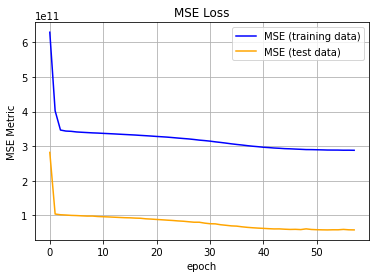

In [ ]:
plt.title('MSE Loss')
plt.plot(history['mse'], label='MSE (training data)',color='blue')
plt.plot(history['val_mse'], label='MSE (test data)',color='orange')
plt.ylabel('MSE Metric')
plt.xlabel('epoch')
plt.legend(['MSE (training data)', 'MSE (test data)'], loc='upper right')

plt.grid()
plt.show()

(0.0, 5000000.0)

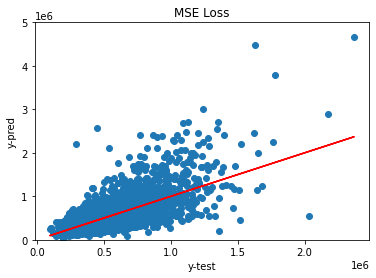

In [ ]:
# Visualizing Our predictions
plt.scatter(y_pred,y_test)
# Perfect predictions
plt.plot(y_pred,y_pred,'r')
plt.title('MSE Loss')
plt.xlabel('y-test')
plt.ylabel('y-pred')
plt.ylim([0,0.5e7])

## MAE LOSS

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu',input_shape=(15,),kernel_initializer='normal'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_absolute_error', optimizer='adam',  metrics=['mse', 'mae'])
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True,verbose=1)
trained_model = model.fit(X_train,y_train, batch_size=16, epochs=150, validation_split=0.15 ,callbacks =[earlystopping]) 
history = trained_model.history

Epoch 1/150
196/196 [==============================] - 1s 3ms/step - loss: 545793.2500 - mse: 644503306240.0000 - mae: 545793.2500 - val_loss: 482202.0312 - val_mse: 337423859712.0000 - val_mae: 482202.0312
Epoch 2/150
196/196 [==============================] - 0s 3ms/step - loss: 350409.3438 - mse: 466366955520.0000 - mae: 350409.3438 - val_loss: 220536.7344 - val_mse: 119722516480.0000 - val_mae: 220536.7344
Epoch 3/150
196/196 [==============================] - 0s 2ms/step - loss: 234266.0312 - mse: 357133221888.0000 - mae: 234266.0312 - val_loss: 213993.7500 - val_mse: 110030233600.0000 - val_mae: 213993.7500
Epoch 4/150
196/196 [==============================] - 0s 2ms/step - loss: 231772.3750 - mse: 354143961088.0000 - mae: 231772.3750 - val_loss: 212499.9531 - val_mse: 108492414976.0000 - val_mae: 212499.9531
Epoch 5/150
196/196 [==============================] - 0s 2ms/step - loss: 230191.6719 - mse: 351566725120.0000 - mae: 230191.6719 - val_loss: 211227.2969 - val_mse: 106788

In [ ]:
# history
Y_pred = model.predict(X_test)
y_pred=np.ravel(Y_pred)  
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 174366.67
MSE: 256720860000.0
VarScore: 0.1767963171005249


In [ ]:
# prediction
print(y_pred)
print(y_test)

[372070.72 550932.4  561199.94 ... 517932.38 508232.72 570439.3 ]
[320000. 411000. 687000. ... 450000. 283200. 550000.]


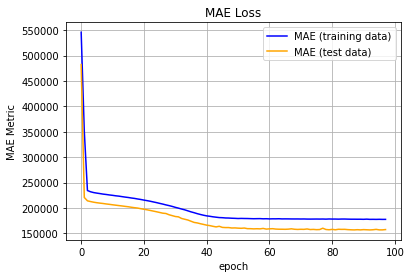

In [ ]:
plt.title('MAE Loss')
plt.plot(history['mae'], label='MAE (training data)',color='blue')
plt.plot(history['val_mae'], label='MAE (test data)',color='orange')
plt.ylabel('MAE Metric')
plt.xlabel('epoch')
plt.legend(['MAE (training data)', 'MAE (test data)'], loc='upper right')
plt.grid()
plt.show()

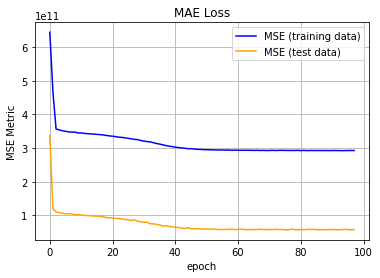

In [ ]:
plt.title('MAE Loss')
plt.plot(history['mse'], label='MSE (training data)',color='blue')
plt.plot(history['val_mse'], label='MSE (test data)',color='orange')
plt.ylabel('MSE Metric')
plt.xlabel('epoch')
plt.legend(['MSE (training data)', 'MSE (test data)'], loc='upper right')
plt.grid()
plt.show()

(0.0, 4000000.0)

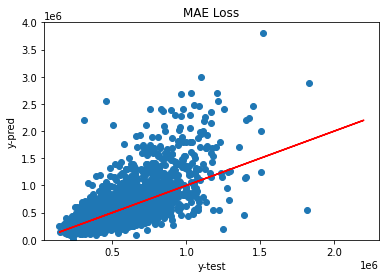

In [ ]:
# Visualizing Our predictions
plt.scatter(y_pred,y_test)
# Perfect predictions
plt.plot(y_pred,y_pred,'r')
plt.title('MAE Loss')
plt.xlabel('y-test')
plt.ylabel('y-pred')
plt.ylim([0,4e6])

# Bonus Section


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

### Linear Regression

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)

# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 162243.2
MSE: 244478700000.0
VarScore: 0.2132859230041504


### Ridge Regression

In [ ]:
# define model
Ridge_model = Ridge(alpha=0.9)
Ridge_model.fit(X_train, y_train)

Ridge(alpha=0.9)

In [ ]:
#compare actual output values with predicted values
y_pred = Ridge_model.predict(X_test)

# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 162259.86
MSE: 244479670000.0
VarScore: 0.21328282356262207
